In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
my_data_dir = 'C:\\Users\\Shahar\\Desktop\\Deep_Learning_Projects\\PET_DATA\\images'

test_path = my_data_dir + '\\test\\'
train_path = my_data_dir + '\\train\\'

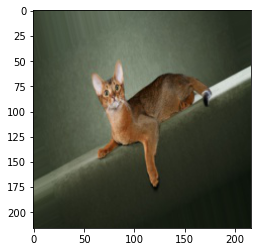

In [11]:
chihuahua_cell_path = train_path + '\\abyssinian\\' + os.listdir(train_path + '\\abyssinian')[0]
chihuahua_cell = imread(chihuahua_cell_path)
plt.imshow(chihuahua_cell)

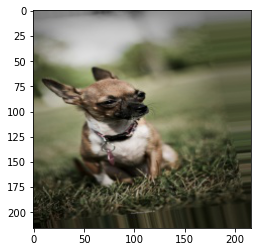

In [12]:
chihuahua_cell_path = train_path + '\\chihuahua\\' + os.listdir(train_path + '\\chihuahua')[0]
chihuahua_cell = imread(chihuahua_cell_path)
plt.imshow(chihuahua_cell)

In [13]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '\\abyssinian'):
    
    img = imread(test_path + '\\abyssinian' + '\\' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
print(np.mean(dim1))
print(np.mean(dim2))

216.0
216.0


In [14]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '\\chihuahua'):
    
    img = imread(test_path + '\\chihuahua' + '\\' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
print(np.mean(dim1))
print(np.mean(dim2))

216.0
216.0


In [15]:
image_gen = ImageDataGenerator()

print(image_gen.flow_from_directory(train_path))
print(image_gen.flow_from_directory(test_path))

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [16]:
image_shape = (216, 216, 3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [17]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', class_mode='binary')

Found 1600 images belonging to 2 classes.


In [18]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', class_mode='binary', shuffle=False)

Found 400 images belonging to 2 classes.


In [19]:
train_image_gen.class_indices

{'abyssinian': 0, 'chihuahua': 1}

In [23]:
results = model.fit(x=train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
50/50 [==============================] - 17s 336ms/step - loss: 0.2807 - accuracy: 0.8931 - val_loss: 0.8450 - val_accuracy: 0.6500
Epoch 2/20
50/50 [==============================] - 17s 337ms/step - loss: 0.1729 - accuracy: 0.9344 - val_loss: 0.8758 - val_accuracy: 0.6625
Epoch 3/20
50/50 [==============================] - 17s 339ms/step - loss: 0.0891 - accuracy: 0.9731 - val_loss: 1.1928 - val_accuracy: 0.6500


<AxesSubplot:>

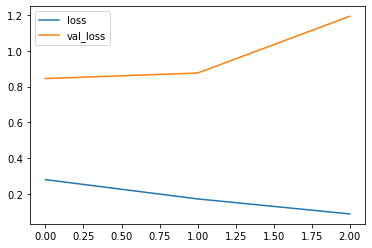

In [24]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [25]:
pred_probabilities = model.predict_generator(test_image_gen)
predictions = pred_probabilities > 0.5

print(classification_report(test_image_gen.classes, predictions))

C:\Users\Shahar\AppData\Local\Temp/ipykernel_4892/4089597270.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_image_gen)


              precision    recall  f1-score   support

           0       0.66      0.63      0.64       200
           1       0.64      0.67      0.66       200

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400

